<h1> L1 Lasso regularization feature selection method</h1>

In [9]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from timeit import default_timer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_preprocessed = pd.read_excel("game_reviews_preprocessed.xlsx", index_col=0)

In [3]:
df_preprocessed

,review,voted_up
37439,zeskalowanie świat tracić niemal zupełnie sens...,False
1414,totalny dno kolejka hdodanie serwer wcale nie ...,False
12728,dobra typ gracz nudzić samotny biegać kopalnia...,True
11891,fajny poczuć pikselowym świat otoczyć szlam zo...,True
20635,raz zaczynać sezon niepotrzebny stres niepotrz...,False
...,...,...
37771,tył czas zmarnować internet cholerstwo nie chc...,False
73100,skórka cena gem tragedia dobierać gracz meczeć...,False
4761,ciągły wywalać kolejka kolejka kompania gracz ...,False
41470,naprawdę nieudany postać sporo tył odblokować ...,False


In [4]:
df_preprocessed.drop_duplicates(subset=['review'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['review'], df_preprocessed['voted_up'], test_size=0.3, random_state=42)

In [5]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train = vectorizer.fit_transform(X_train)
tfidf_tokens = vectorizer.get_feature_names()

print(X_train.shape)
X_train = pd.DataFrame(X_train.toarray(), columns=tfidf_tokens)
X_train.head()

(2554, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from collections import Counter
words_to_count = (word for word in tfidf_tokens if word[:1].isupper())
c = Counter(words_to_count)
print(c.most_common(10))

[]


In [7]:
X_test = vectorizer.transform(X_test)
# tfidf_tokens = vectorizer.get_feature_names()

print(X_test.shape)
X_test = pd.DataFrame(X_test.toarray(), columns=tfidf_tokens)
X_test.head()

(1095, 116113)


,aaaale,aaaale drzewko,aberration,aberration znajdować,ability,ability draft,abnegacki,abnegacki cieć,abo,abo zacząć,...,żółty zwłaszcza,żółty światło,żółw,żółw stawiać,żółw wracać,żółwik,żółwik wyglądać,żądać,żądać rekompensata,żądać zwrot
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
all_c = np.arange(0.5, 5, 0.2)
all_selectors = []

for c in all_c:
    # print(f"> Fitting - ")
    lsvc = LinearSVC(C=c, penalty="l1", dual=False).fit(X_train, y_train)
    selector = SelectFromModel(lsvc, prefit=True)
    all_selectors.append(selector)

<h3> MultinomialNB </h3>

> Training and evaluating MultinomialNB model for 1 selector with 143 features
0.0004911999999421823
> Training and evaluating MultinomialNB model for 2 selector with 235 features
0.0008381999998618994
> Training and evaluating MultinomialNB model for 3 selector with 351 features
0.0008323999998083309
> Training and evaluating MultinomialNB model for 4 selector with 434 features
0.0014180999999098276
> Training and evaluating MultinomialNB model for 5 selector with 541 features
0.0014132999999674212
> Training and evaluating MultinomialNB model for 6 selector with 621 features
0.0014119999998456478
> Training and evaluating MultinomialNB model for 7 selector with 733 features
0.001893099999961123
> Training and evaluating MultinomialNB model for 8 selector with 801 features
0.001877600000170787
> Training and evaluating MultinomialNB model for 9 selector with 874 features
0.0026116999999885593
> Training and evaluating MultinomialNB model for 10 selector with 930 features
0.00285069999

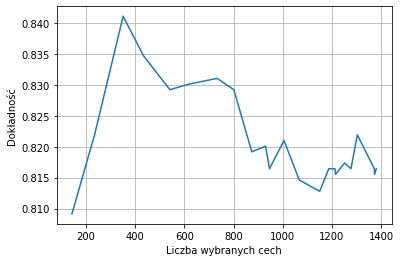

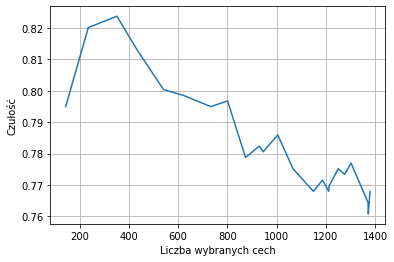

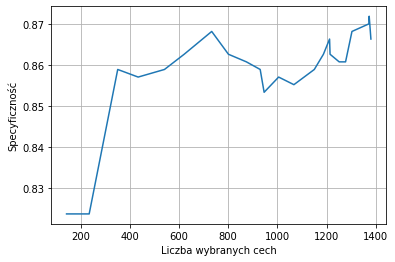

In [11]:
all_scores_MultinomialNB = []
all_specifity_MultinomialNB = []
all_recall_MultinomialNB = []
all_classif_times_MultinomialNB = []
all_features_number = []
score_best_MultinomialNB = 0
specifity_best_MultinomialNB = 0
recall_best_MultinomialNB = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating MultinomialNB model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

    model = GridSearchCV(MultinomialNB(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_MultinomialNB.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_MultinomialNB.append(score)
    all_specifity_MultinomialNB.append(specificity)
    all_recall_MultinomialNB.append(recall)

    if score > score_best_MultinomialNB:
        score_best_MultinomialNB = score
        specifity_best_MultinomialNB = specificity
        recall_best_MultinomialNB = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_MultinomialNB = model
        best_features_MultinomialNB = sel


print(f"Best k is {k_best} with score {score_best_MultinomialNB}, recall {recall_best_MultinomialNB} and specifity {specifity_best_MultinomialNB}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_recall_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_specifity_MultinomialNB)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> SVC </h3>

> Training and evaluating SVC model for 1 selector with 143 features
0.25200760000006994
> Training and evaluating SVC model for 2 selector with 235 features
0.24108450000039738
> Training and evaluating SVC model for 3 selector with 351 features
0.851567900000191
> Training and evaluating SVC model for 4 selector with 434 features
0.47010620000037306
> Training and evaluating SVC model for 5 selector with 541 features
0.5314552000008916
> Training and evaluating SVC model for 6 selector with 621 features
0.561211700000058
> Training and evaluating SVC model for 7 selector with 733 features
0.45809449999978824
> Training and evaluating SVC model for 8 selector with 801 features
0.616649900000084
> Training and evaluating SVC model for 9 selector with 874 features
0.7339366999995036
> Training and evaluating SVC model for 10 selector with 930 features
0.9756293999998888
> Training and evaluating SVC model for 11 selector with 946 features
0.9298739000005298
> Training and evaluating SVC

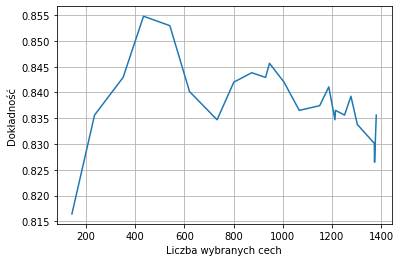

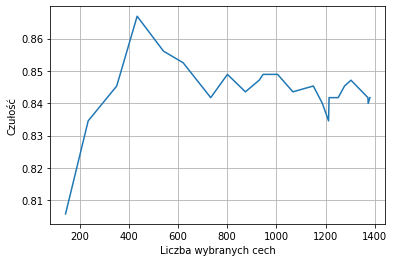

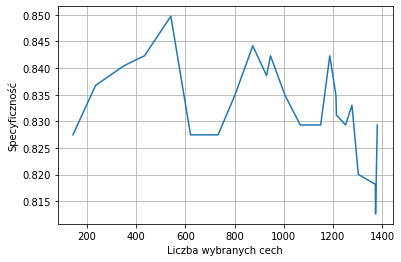

In [12]:
all_scores_SVC = []
all_specifity_SVC = []
all_recall_SVC = []
all_classif_times_SVC = []
all_features_number = []
score_best_SVC = 0
specifity_best_SVC = 0
recall_best_SVC = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating SVC model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001]}

    model = GridSearchCV(SVC(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_SVC.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_SVC.append(score)
    all_specifity_SVC.append(specificity)
    all_recall_SVC.append(recall)

    if score > score_best_SVC:
        score_best_SVC = score
        specifity_best_SVC = specificity
        recall_best_SVC = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_SVC = model
        best_features_SVC = sel


print(f"Best k is {k_best} with score {score_best_SVC}, recall {recall_best_SVC} and specifity {specifity_best_SVC}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_recall_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_specifity_SVC)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3> LogisticRegression </h3>

> Training and evaluating LogisticRegression model for 1 selector with 143 features
0.00048120000064955093
> Training and evaluating LogisticRegression model for 2 selector with 235 features
0.0008338999996340135
> Training and evaluating LogisticRegression model for 3 selector with 351 features
0.0007976000015332829
> Training and evaluating LogisticRegression model for 4 selector with 434 features
0.0008696000004420057
> Training and evaluating LogisticRegression model for 5 selector with 541 features
0.0018590999989100965
> Training and evaluating LogisticRegression model for 6 selector with 621 features
0.0013459999991027871
> Training and evaluating LogisticRegression model for 7 selector with 733 features
0.0018224000014015473
> Training and evaluating LogisticRegression model for 8 selector with 801 features
0.0023677999997744337
> Training and evaluating LogisticRegression model for 9 selector with 874 features
0.002410899998722016
> Training and evaluating LogisticRegression m

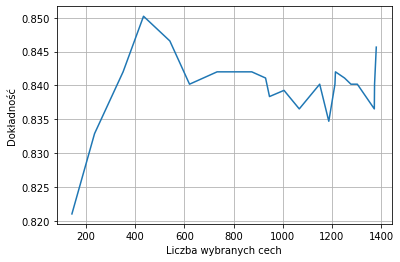

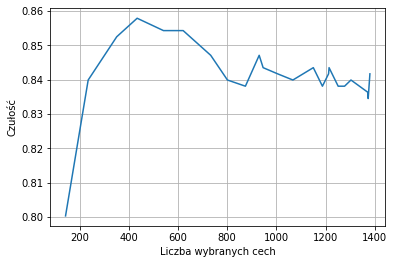

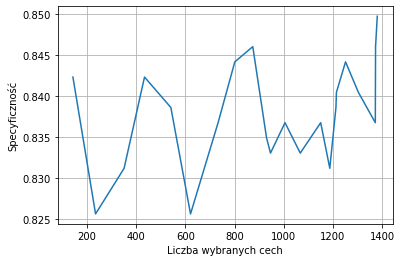

In [13]:
all_scores_LogisticRegression = []
all_specifity_LogisticRegression = []
all_recall_LogisticRegression = []
all_classif_times_LogisticRegression = []
all_features_number = []
score_best_LogisticRegression = 0
specifity_best_LogisticRegression = 0
recall_best_LogisticRegression = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating LogisticRegression model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2', 'elasticnet']}

    model = GridSearchCV(LogisticRegression(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_LogisticRegression.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_LogisticRegression.append(score)
    all_specifity_LogisticRegression.append(specificity)
    all_recall_LogisticRegression.append(recall)

    if score > score_best_LogisticRegression:
        score_best_LogisticRegression = score
        specifity_best_LogisticRegression = specificity
        recall_best_LogisticRegression = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_LogisticRegression = model
        best_features_LogisticRegression = sel


print(f"Best k is {k_best} with score {score_best_LogisticRegression}, recall {recall_best_LogisticRegression} and specifity {specifity_best_LogisticRegression}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_recall_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_specifity_LogisticRegression)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

<h3>RandomForestClassifier</h3>

> Training and evaluating RandomForestClassifier model for 1 selector with 143 features
0.2573296999999002
> Training and evaluating RandomForestClassifier model for 2 selector with 235 features
0.12070430000130727
> Training and evaluating RandomForestClassifier model for 3 selector with 351 features
0.2059822000010172
> Training and evaluating RandomForestClassifier model for 4 selector with 434 features
0.13743070000055013
> Training and evaluating RandomForestClassifier model for 5 selector with 541 features
0.15550019999864162
> Training and evaluating RandomForestClassifier model for 6 selector with 621 features
0.1554584999994404
> Training and evaluating RandomForestClassifier model for 7 selector with 733 features
0.07970690000001923
> Training and evaluating RandomForestClassifier model for 8 selector with 801 features
0.20106790000136243
> Training and evaluating RandomForestClassifier model for 9 selector with 874 features
0.1020304000012402
> Training and evaluating Random

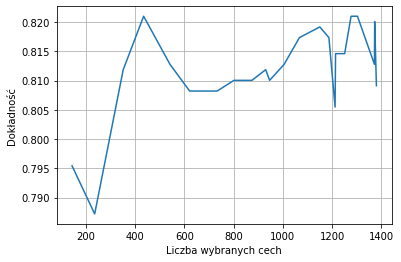

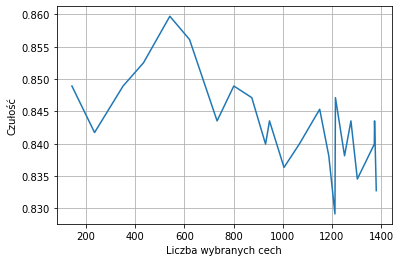

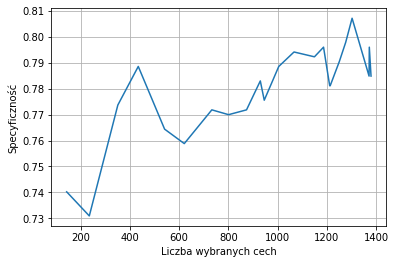

In [14]:
all_scores_RandomForestClassifier = []
all_specifity_RandomForestClassifier = []
all_recall_RandomForestClassifier = []
all_classif_times_RandomForestClassifier = []
all_features_number = []
score_best_RandomForestClassifier = 0
specifity_best_RandomForestClassifier = 0
recall_best_RandomForestClassifier = 0
all_k = [i for i in range(500, 3000, 500)]

for count, sel in enumerate(all_selectors, start=1):
    X_train_new = sel.transform(X_train)
    X_test_new = sel.transform(X_test)

    print(f"> Training and evaluating RandomForestClassifier model for {count} selector with {X_test_new.shape[1]} features")
    all_features_number.append(X_test_new.shape[1])
    param_grid = {'n_estimators': [100, 200, 400, 600]}

    model = GridSearchCV(RandomForestClassifier(), param_grid, verbose=0)
    model.fit(X_train_new,y_train)

    start = default_timer()
    y_pred = model.predict(X_test_new)
    end = default_timer()
    classif_time = end - start
    all_classif_times_RandomForestClassifier.append(classif_time)
    print(classif_time)

    score = accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    recall = tp / (tp+fn)
    all_scores_RandomForestClassifier.append(score)
    all_specifity_RandomForestClassifier.append(specificity)
    all_recall_RandomForestClassifier.append(recall)

    if score > score_best_RandomForestClassifier:
        score_best_RandomForestClassifier = score
        specifity_best_RandomForestClassifier = specificity
        recall_best_RandomForestClassifier = recall
        k_best = X_test_new.shape[1]
        class_best = classification_report(y_test,y_pred)
        conf_best = confusion_matrix(y_test,y_pred)
        best_model_RandomForestClassifier = model
        best_features_RandomForestClassifier = sel


print(f"Best k is {k_best} with score {score_best_RandomForestClassifier}, recall {recall_best_RandomForestClassifier} and specifity {specifity_best_RandomForestClassifier}")
print(class_best)
print(conf_best)
plt.plot(all_features_number, all_scores_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Dokładność")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_recall_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Czułość")
plt.title("")
plt.grid()
plt.show()
plt.plot(all_features_number, all_specifity_RandomForestClassifier)
plt.xlabel("Liczba wybranych cech")
plt.ylabel("Specyficzność")
plt.title("")
plt.grid()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


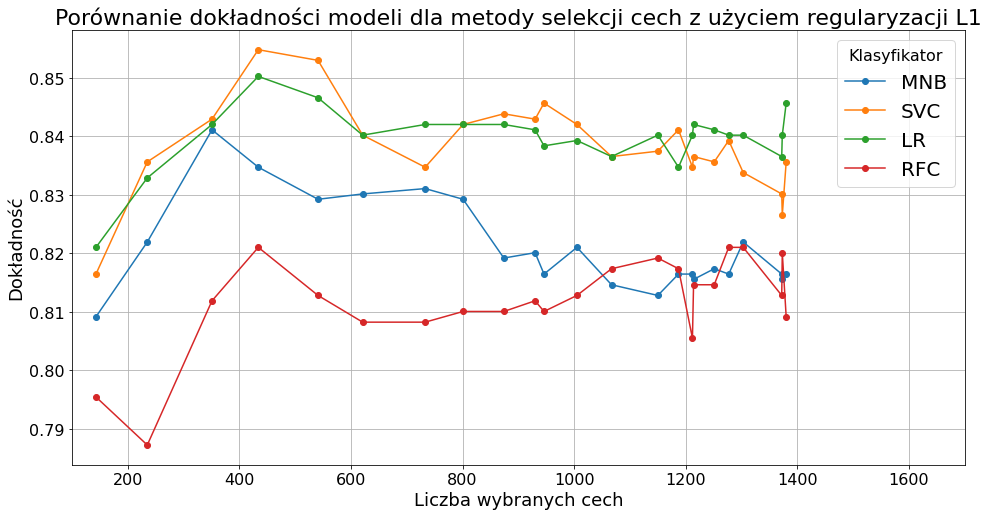

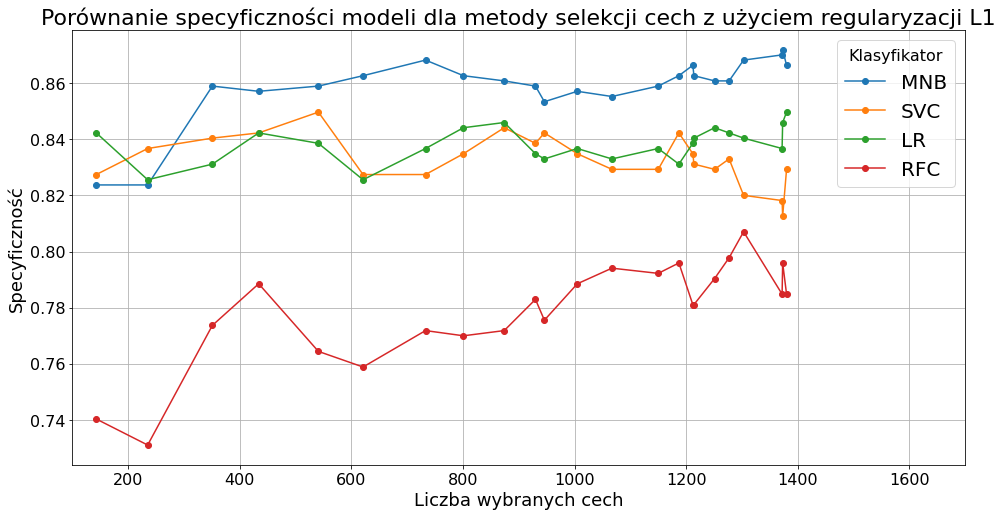

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


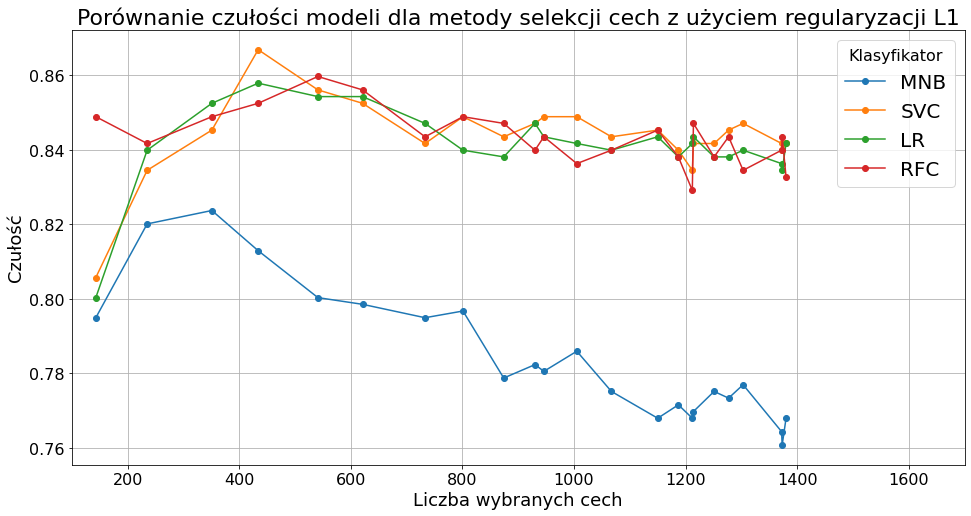

In [21]:
plt.figure(figsize=(16, 8))

plt.plot(all_features_number, all_scores_MultinomialNB, '-o')
plt.plot(all_features_number, all_scores_SVC, '-o')
plt.plot(all_features_number, all_scores_LogisticRegression, '-o')
plt.plot(all_features_number, all_scores_RandomForestClassifier, '-o')

plt.xlim(100, 1700)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Dokładność", fontsize=18)
plt.title("Porównanie dokładności modeli dla metody selekcji cech z użyciem regularyzacji L1", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\lasso_accuracy.eps', format='eps', dpi=1200)

plt.figure(figsize=(16, 8))

plt.plot(all_features_number, all_specifity_MultinomialNB, '-o')
plt.plot(all_features_number, all_specifity_SVC, '-o')
plt.plot(all_features_number, all_specifity_LogisticRegression, '-o')
plt.plot(all_features_number, all_specifity_RandomForestClassifier, '-o')

plt.xlim(100, 1700)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Specyficzność", fontsize=18)
plt.title("Porównanie specyficzności modeli dla metody selekcji cech z użyciem regularyzacji L1", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\lasso_specifity.eps', format='eps', dpi=1200)
plt.show()

plt.figure(figsize=(16, 8))

plt.plot(all_features_number, all_recall_MultinomialNB, '-o')
plt.plot(all_features_number, all_recall_SVC, '-o')
plt.plot(all_features_number, all_recall_LogisticRegression, '-o')
plt.plot(all_features_number, all_recall_RandomForestClassifier, '-o')

plt.xlim(100, 1700)

plt.legend(["MNB", "SVC", "LR", "RFC"], prop={"size":20}, title="Klasyfikator", title_fontsize=16)
plt.xlabel("Liczba wybranych cech", fontsize=18)
plt.ylabel("Czułość", fontsize=18)
plt.title("Porównanie czułości modeli dla metody selekcji cech z użyciem regularyzacji L1", fontsize=22)
plt.grid()
plt.tick_params(axis='both', labelsize=16)
plt.savefig(r'D:\\etrapez\\Praca_Inzynierska\\PNG\\results\\lasso_recall.eps', format='eps', dpi=1200)
plt.show()

In [18]:
pd.DataFrame(np.array([all_classif_times_MultinomialNB, all_classif_times_SVC, all_classif_times_LogisticRegression, all_classif_times_RandomForestClassifier]), index=["MNB", "SVC", "LR", "RFC"], columns=all_features_number)

,143,235,351,434,541,621,733,801,874,930,...,1150,1187,1212,1214,1251,1277,1303,1372,1373,1380
MNB,0.000491,0.000838,0.000832,0.001418,0.001413,0.001412,0.001893,0.001878,0.002612,0.002851,...,0.005277,0.004329,0.002535,0.003355,0.003935,0.003934,0.003168,0.005608,0.003016,0.003828
SVC,0.252008,0.241085,0.851568,0.470106,0.531455,0.561212,0.458094,0.616650,0.733937,0.975629,...,1.049778,1.272510,1.086406,0.997786,0.933511,1.055716,1.311538,1.355281,1.064098,1.324910
LR,0.000481,0.000834,0.000798,0.000870,0.001859,0.001346,0.001822,0.002368,0.002411,0.002130,...,0.002300,0.003028,0.003892,0.002869,0.003583,0.002449,0.002578,0.002575,0.003973,0.002481
RFC,0.257330,0.120704,0.205982,0.137431,0.155500,0.155458,0.079707,0.201068,0.102030,0.189346,...,0.241886,0.238050,0.200488,0.205283,0.306883,0.193696,0.052365,0.366219,0.356777,0.274122
